In [1]:
# Task 1: EDA and Visualization of a Real-World Dataset

In [2]:
# 1. import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 2. Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# 3. Initial Data Exploaration

# Check the number of rows and columns in the dataset
df.shape

(891, 15)

In [6]:
# Get an info of the dataset including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# Get detailed statistics for all columns (both numeric and categorical)
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking missing values in each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Checking duplicate rows in the dataset
df.duplicated().sum()

107

In [10]:
# 4. Data Cleaning

# Remove duplicates
df = df.drop_duplicates()

In [11]:
# Handling missing Values

# Fill missing values in 'embark_town' with the mode
df['embark_town'].fillna(df['embark_town'].mode()[0])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
885     Queenstown
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 784, dtype: object

In [12]:
# Fill missing values in 'age' with the median age
df['age'].fillna(df['age'].median())

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
885    39.00
887    19.00
888    28.25
889    26.00
890    32.00
Name: age, Length: 784, dtype: float64

In [13]:
# Fill missing values in 'embarked' with the mode
df['embarked'].fillna(df['embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
887    S
888    S
889    C
890    Q
Name: embarked, Length: 784, dtype: object

In [14]:
# Drop the 'deck' column since it has too many missing values
df.drop(columns='deck', inplace=True)

In [15]:
# Confirm that all missing values have been handled
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [16]:
# since the values are not completely filled so, make sure 'age' is numeric and handle any invalid values
# convert invalid values to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce') 

In [17]:
# Fill remaining missing values in 'age' with the median
df['age'] = df['age'].fillna(df['age'].median())

In [18]:
# Fill remaining missing values in 'embarked' with the mode (most frequent value)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [19]:
# Fill remaining missing values in 'embark_town' with the mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [20]:
# Confirm if all missing values are now handled
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


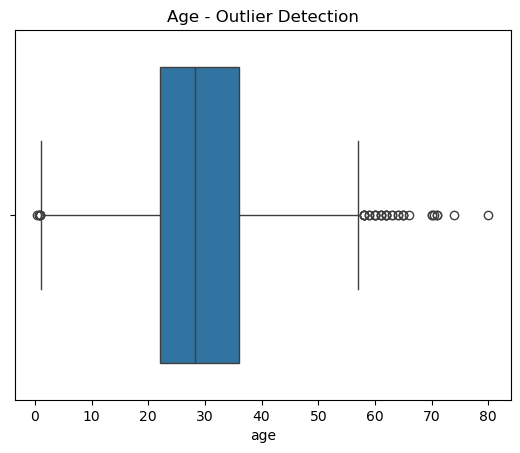

In [21]:
# 5. Outlier detection 

# boxplot
sns.boxplot(x=df['age'])
plt.title("Age - Outlier Detection")
plt.show()

In [22]:
# Remove outliers using Interquartile range (IQR)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]

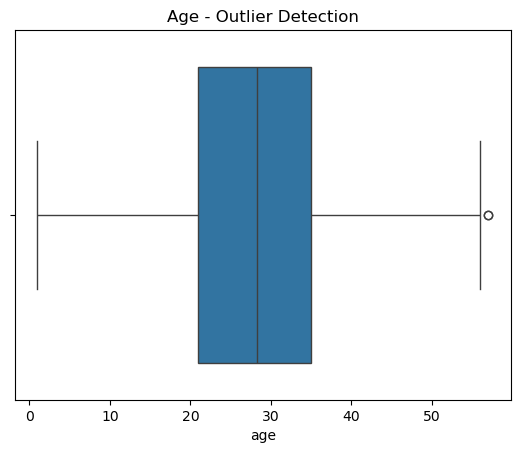

In [23]:
# Boxplot after fixing the outliers
sns.boxplot(x=df['age'])
plt.title("Age - Outlier Detection")
plt.show()

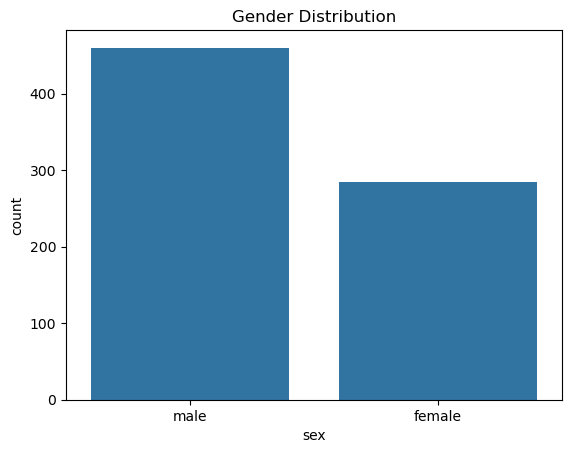

In [24]:
# 6. Visualization
# Categorical variables: Bar Chart
# Gender Distribution
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

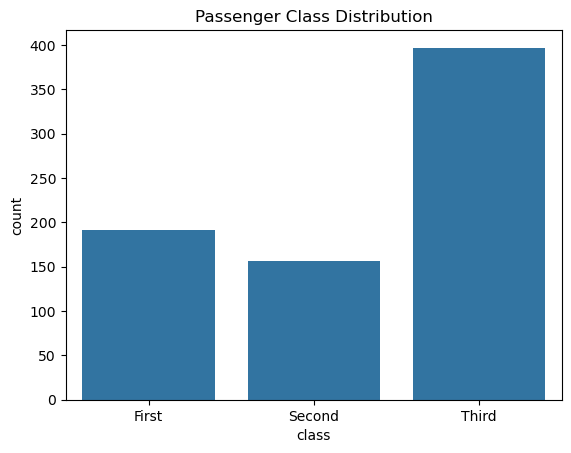

In [25]:
# Passenger Class Distribution
sns.countplot(x='class', data=df)
plt.title("Passenger Class Distribution")
plt.show()

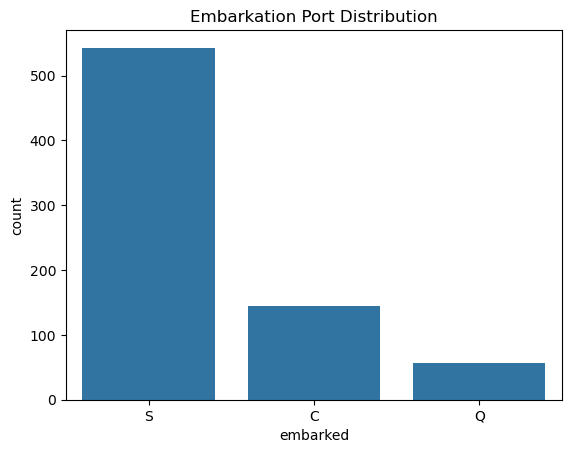

In [26]:
# Embarkation Port Distribution
sns.countplot(x='embarked', data=df)
plt.title("Embarkation Port Distribution")
plt.show()

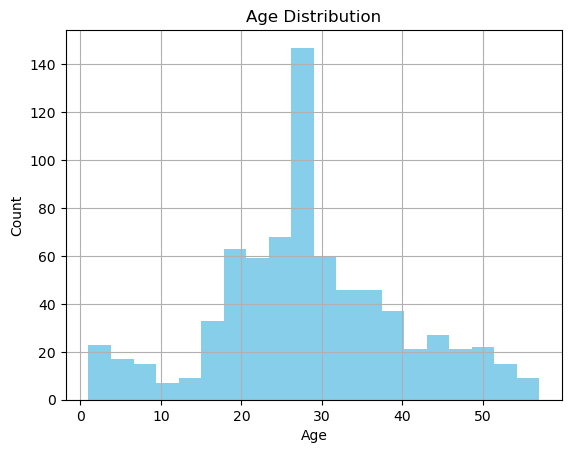

In [27]:
# Numerical variables: Histogram
# Age Distribution
df['age'].hist(bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

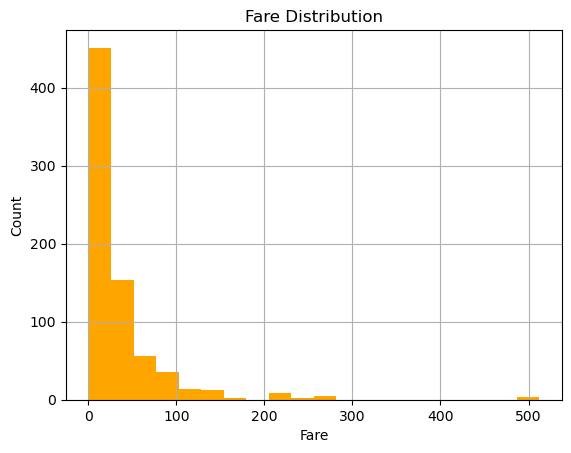

In [28]:
# Fare Distribution
df['fare'].hist(bins=20, color='orange')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

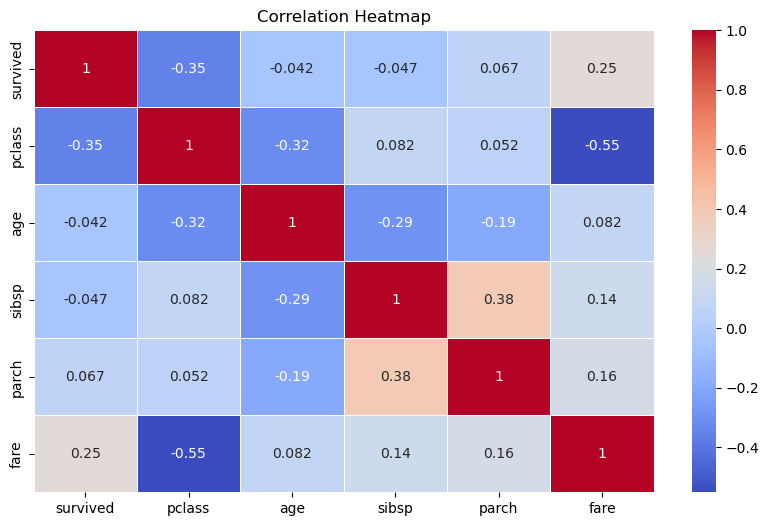

In [29]:
# Corelation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()